<a href="https://colab.research.google.com/github/dindilikhitha05/ML-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Project: Student Performance Indicator

In [22]:
#Basic Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Modelling
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings

In [23]:
df=pd.read_csv("/content/sample_data/StudentsPerformance_3_lyst1729690388778.csv")

In [24]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [25]:
x=df.drop(columns=['math score'])
y=df['math score']

In [26]:
#Data checks --> Missing_values,Duplicates,Outliers,Data Types
df.isnull().any()

,0
gender,False
race/ethnicity,False
parental level of education,False
lunch,False
test preparation course,False
math score,False
reading score,False
writing score,False


In [27]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [28]:
#creation of transformer columns:

num_cols=x.select_dtypes(include='number').columns
cat_cols=x.select_dtypes(include='object').columns

num_trans=StandardScaler()
oh_trans=OneHotEncoder()

preprocessor=ColumnTransformer([
    ("OneHotEncoder",oh_trans,cat_cols),
    ("StandardScaler",num_trans,num_cols)
])

x=preprocessor.fit_transform(x)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=63)

In [30]:
#creating an evaluate function to give all metrics after model training:

def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mean_squared_error(true,predicted))
  r2=r2_score(true,predicted)
  return mae,mse,rmse,r2

In [31]:
#Train Models:
models={
    "lr" : LinearRegression(),
    "ridge" : Ridge(),
    "lasso" : Lasso(),
    "knn" : KNeighborsRegressor(),
    "dt" : DecisionTreeRegressor(),
    "rf" : RandomForestRegressor()

}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train) #train model

  #Mkae predictions
  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)

  #evaluate train and test dataset
  model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])
  print("Model performance for training set")
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Squared Error: {:.4f}".format(model_train_mse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))
  print("----------------------------------")
  print("Model performance for test set")
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Squared Error: {:.4f}".format(model_test_mse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)
  print("="*35)
  print("\n")


lr
Model performance for training set
- Root Mean Squared Error: 5.2508
- Mean Squared Error: 27.5709
- Mean Absolute Error: 4.1848
- R2 Score: 0.8828
----------------------------------
Model performance for test set
- Root Mean Squared Error: 5.6560
- Mean Squared Error: 31.9906
- Mean Absolute Error: 4.5060
- R2 Score: 0.8459


ridge
Model performance for training set
- Root Mean Squared Error: 5.2510
- Mean Squared Error: 27.5733
- Mean Absolute Error: 4.1837
- R2 Score: 0.8828
----------------------------------
Model performance for test set
- Root Mean Squared Error: 5.6574
- Mean Squared Error: 32.0058
- Mean Absolute Error: 4.5089
- R2 Score: 0.8458


lasso
Model performance for training set
- Root Mean Squared Error: 6.4600
- Mean Squared Error: 41.7312
- Mean Absolute Error: 5.0482
- R2 Score: 0.8226
----------------------------------
Model performance for test set
- Root Mean Squared Error: 6.8057
- Mean Squared Error: 46.3170
- Mean Absolute Error: 5.5652
- R2 Score: 0.7769


In [32]:
result = pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name","R2_Score"])
result_sorted = result.sort_values(by="R2_Score", ascending=False)
result_sorted

,Model Name,R2_Score
0,lr,0.845889
1,ridge,0.845816
5,rf,0.818571
2,lasso,0.776873
3,knn,0.754685
4,dt,0.654834


In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score= r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.59


Text(0, 0.5, 'Predicted')

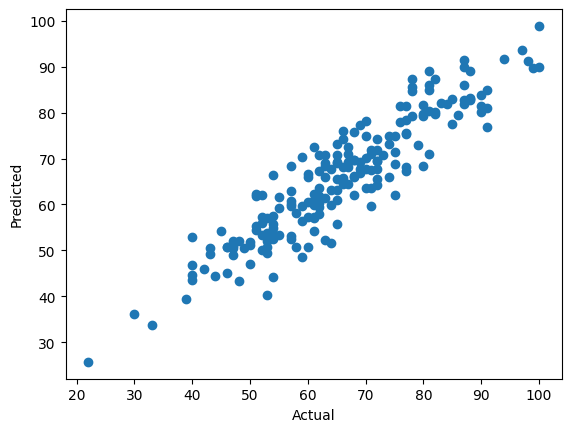

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

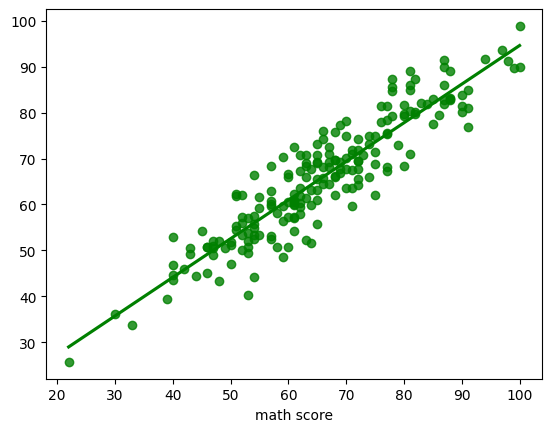

In [35]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green')

In [36]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
609,58,58.103983,-0.103983
164,81,86.138471,-5.138471
221,87,82.787522,4.212478
663,65,61.032141,3.967859
55,33,33.834015,-0.834015
...,...,...,...
623,100,90.030575,9.969425
686,85,77.509664,7.490336
603,60,57.182405,2.817595
887,54,66.505760,-12.505760
